In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings

warnings.filterwarnings("ignore")

In [152]:
interval_1 = pd.read_csv("C:/Users/simen/Desktop/training_analyses/data/battle_of_the_intervals/interval_1.csv")

### Clean data

In [158]:
# Select relevant columns

interval_1 = interval_1[[
    "record.timestamp[s]",
    "record.heart_rate[bpm]",
    "record.power[watts]"
    ]]

# Create elapsed time column

interval_1["elapsed_time"] = interval_1["record.timestamp[s]"] - interval_1["record.timestamp[s]"].min()

# Create interval column

conditions = [
    (interval_1["elapsed_time"] > 12*60) & (interval_1["elapsed_time"] > 22*60),
    (interval_1["elapsed_time"] > 24*60) & (interval_1["elapsed_time"] > 34*60),
    (interval_1["elapsed_time"] > 36*60) & (interval_1["elapsed_time"] > 46*60)
]

choices = [1,2,3]

interval_1["interval"] = np.select(conditions, choices, default=np.nan)

# Normalized power and HR

max_hr = 195
body_weight = 65

interval_1["hr_normalized"] = interval_1["record.heart_rate[bpm]"] / max_hr * 100
interval_1["pwr_normalized"] = interval_1["record.power[watts]"] / body_weight
interval_1["elapsed_time_min"] = interval_1["elapsed_time"] / 60

### Analysis

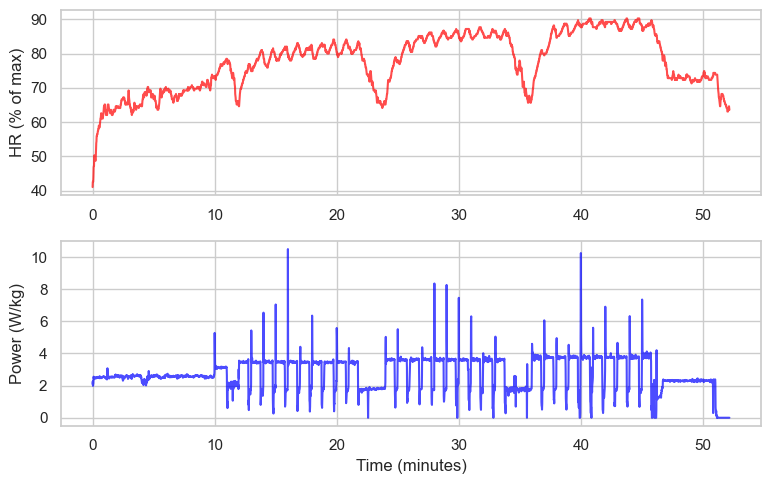

In [154]:
## Heart rate and watts as a function of time for the whole session

# Function that plots heart rate and power as a function of time for normalized data

def plot_normalized_pwr_hr(dataframe):

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,5))

    sns.set_theme(style="whitegrid")

    # Heart rate

    sns.lineplot(
        x=dataframe["elapsed_time_min"],
        y=dataframe["hr_normalized"],
        color="red",
        alpha=0.7,
        ax=axes[0]
        )

    # Heart rate

    sns.lineplot(
        x=dataframe["elapsed_time_min"],
        y=dataframe["pwr_normalized"],
        color="blue",
        alpha=0.7,
        ax=axes[1]
    )

    # Details

    axes[0].set_ylabel("HR (% of max)")
    axes[0].set_xlabel("")
    axes[0].grid(True)
    axes[1].set_ylabel("Power (W/kg)")
    axes[1].set_xlabel("Time (minutes)")
    axes[1].grid(True)

    plt.tight_layout()

plot_normalized_pwr_hr(interval_1)

# Save plot

os.chdir("C:/Users/simen/Desktop/training_analyses/figures/battle_of_the_intervals")

plt.savefig("test_plot.jpg", dpi=300)

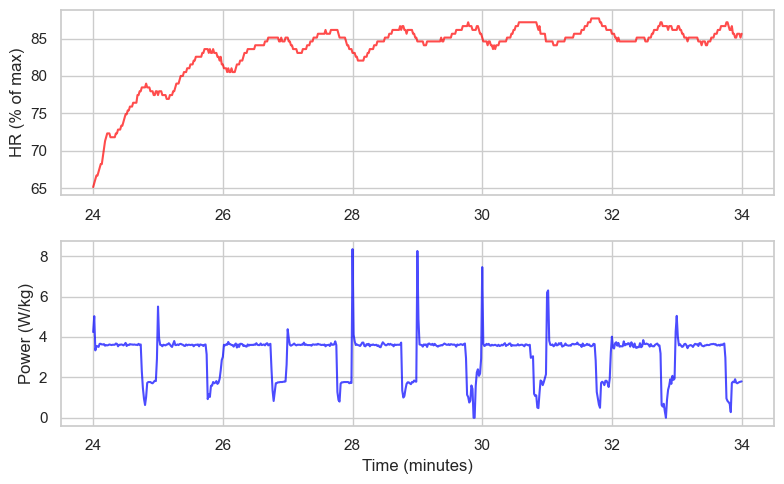

In [155]:
## Heart rate as a function of time, second interval

interval_1_int_2 = interval_1[(interval_1["elapsed_time_min"] >= 24) & (interval_1["elapsed_time_min"] <= 34)]

plot_normalized_pwr_hr(interval_1_int_2)

os.chdir("C:/Users/simen/Desktop/training_analyses/figures/battle_of_the_intervals")

plt.savefig("test_plot_int_2.jpg", dpi=300)

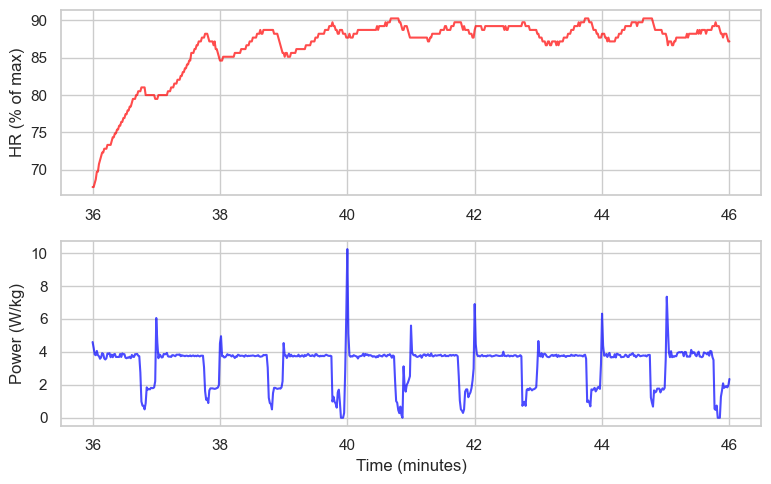

In [156]:
## Heart rate as a function of time, third interval

interval_1_int_3 = interval_1[(interval_1["elapsed_time_min"] >= 36) & (interval_1["elapsed_time_min"] <= 46)]

plot_normalized_pwr_hr(interval_1_int_3)

os.chdir("C:/Users/simen/Desktop/training_analyses/figures/battle_of_the_intervals")

plt.savefig("test_plot_int_3.jpg", dpi=300)